In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.shape

(6019, 14)

In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


# Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
missing = df.isnull().columns

In [10]:
j = 0
for i in df.isnull().sum():
    percentage = i/6019  *100
    print(f'The {missing[j]} column have percentage {percentage} data missing')
    j+=1

The Name column have percentage 0.0 data missing
The Location column have percentage 0.0 data missing
The Year column have percentage 0.0 data missing
The Kilometers_Driven column have percentage 0.0 data missing
The Fuel_Type column have percentage 0.0 data missing
The Transmission column have percentage 0.0 data missing
The Owner_Type column have percentage 0.0 data missing
The Mileage column have percentage 0.033228110981890685 data missing
The Engine column have percentage 0.5981059976740323 data missing
The Power column have percentage 0.5981059976740323 data missing
The Seats column have percentage 0.6977903306197043 data missing
The New_Price column have percentage 86.31001827546105 data missing
The Price column have percentage 0.0 data missing


In [11]:
df.drop('New_Price',inplace=True,axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [13]:
df['Seats'] = df['Seats'].replace(np.nan,df['Seats'].mean())

In [14]:
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return x
    
df['Mileage'] = df['Mileage'].apply(mileage_convert)

In [15]:
miss_cat_col = ['Mileage','Engine','Power']
for i in miss_cat_col:
    freq = df[i].mode()[0]
    df[i] = df[i].fillna(freq)

In [16]:
df['Engine'] = df['Engine'].map(lambda x:x.split()[0])
df['Power'] = df['Power'].map(lambda x:x.split()[0])

In [17]:
df['Brand'] = df['Name'].map(lambda x: x.split()[0])
df['Model'] = df['Name'].map(lambda x: x.split()[1])

In [18]:
df.drop('Name',inplace=True,axis=1)

In [19]:
df= df[['Brand','Model','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [20]:
df.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74


# Data visulization

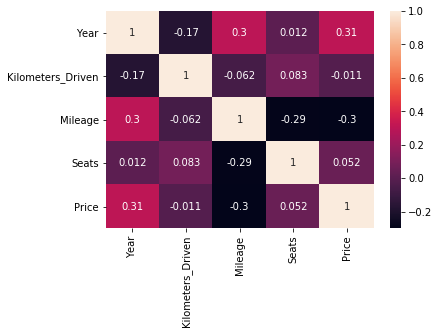

In [21]:
sns.heatmap(df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC7F8E0348>,
      dtype=object)

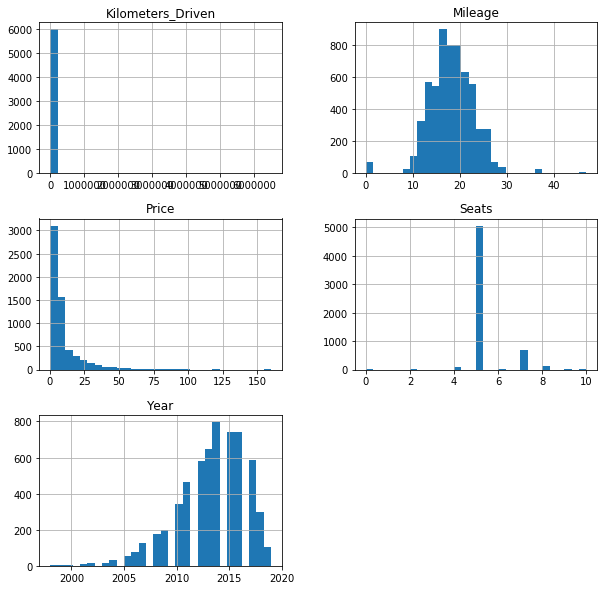

In [22]:
df.hist(bins=30,figsize=(10,10))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


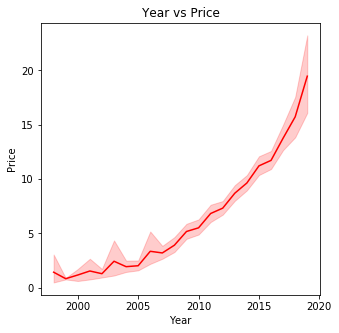

In [23]:
plt.figure(figsize= (5,5))
sns.lineplot(df['Year'],df['Price'],c='red')
plt.title("Year vs Price")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


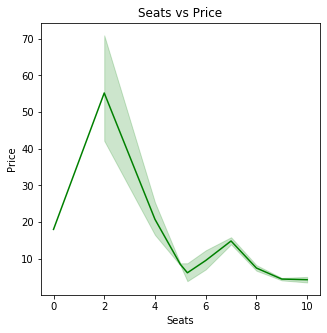

In [24]:
plt.figure(figsize= (5,5))
sns.lineplot(df['Seats'],df['Price'],c='g')
plt.title("Seats vs Price")
plt.show()

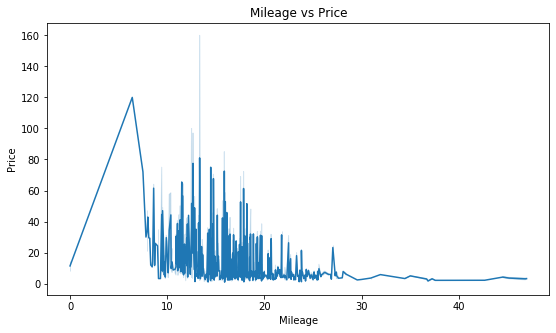

In [25]:
plt.figure(figsize= (9,5))
sns.lineplot(df['Mileage'],df['Price'])
plt.title("Mileage vs Price")
plt.show()

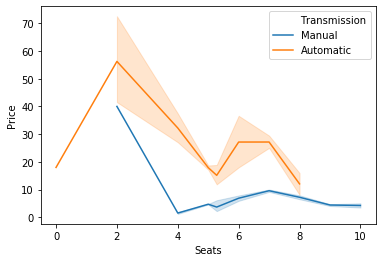

In [61]:
sns.lineplot(y=df['Price'],x=df['Seats'],hue=df['Transmission'])

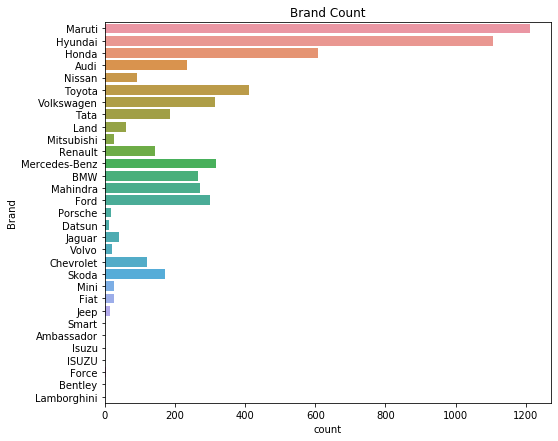

In [26]:
plt.figure(figsize=(8,7))
sns.countplot(y=df['Brand'])
plt.title("Brand Count")
plt.show()

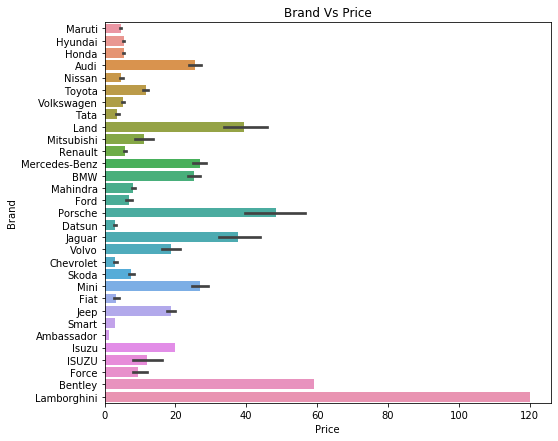

In [28]:
plt.figure(figsize=(8,7))
sns.barplot(x='Price',y="Brand", data=df)
plt.title("Brand Vs Price")
plt.show()

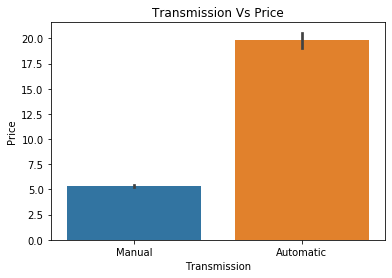

In [36]:
sns.barplot(df['Transmission'],df['Price'])
plt.title("Transmission Vs Price")
plt.show()

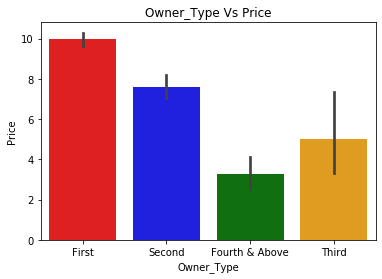

In [41]:
sns.barplot(df['Owner_Type'],df['Price'],palette={'First':'red','Second':'blue','Fourth & Above':'green','Third':'orange'})
plt.title("Owner_Type Vs Price")
plt.show()

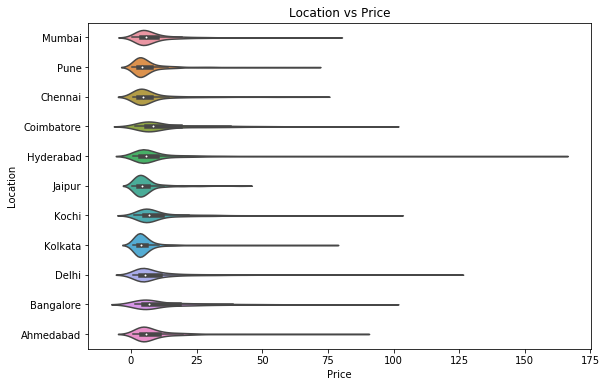

In [54]:
plt.figure(figsize=(9,6))
sns.violinplot(y=df['Location'],x=df['Price'])
plt.title("Location vs Price")
plt.show()

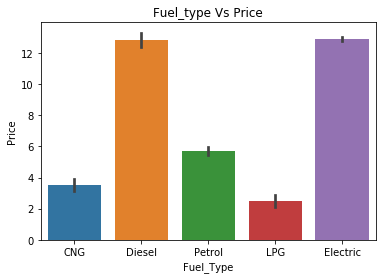

In [45]:
sns.barplot(df['Fuel_Type'],df['Price'])
plt.title("Fuel_type Vs Price")
plt.show()

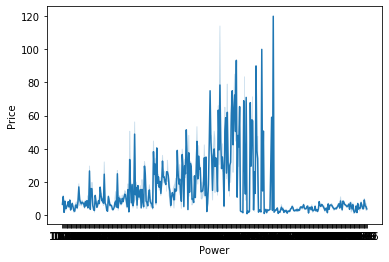

In [50]:
sns.lineplot(df['Power'],df['Price'])